In [15]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import datetime

In [16]:
df=pd.read_csv("taxi_2016_05.csv", index_col=0)

In [17]:
df = df.T

In [18]:
df

,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,2016-05-01 05:00:00,2016-05-01 06:00:00,2016-05-01 07:00:00,2016-05-01 08:00:00,2016-05-01 09:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
num_of_zones = df.shape[0]
num_of_zeros_zones = 0
drop_indexes = [] 
trips = np.array(df)
for i in range(trips.shape[0]):
    if trips[i].sum() == 0:
        num_of_zeros_zones += 1
        drop_indexes.append(i)
#df = df.drop(df.index[drop_indexes])
print('Всего {} зон. Количество зон без поездок за май 2016г - {}.'.format(num_of_zones, num_of_zeros_zones))

Всего 2500 зон. Количество зон без поездок за май 2016г - 1283.


In [20]:
df

,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,2016-05-01 05:00:00,2016-05-01 06:00:00,2016-05-01 07:00:00,2016-05-01 08:00:00,2016-05-01 09:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
import folium
from colour import Color
from matplotlib import pyplot as plt
from matplotlib import image as pltimg
import os

In [22]:

empire_coordinates = [40.748817, -73.985428]
lat = empire_coordinates[0]
lon = empire_coordinates[1]
title = 'Empire State Building'
tooltip = 'OpenStreetMap'
m = folium.Map(location=[40.75, -74.00], 
               
               zoom_start=11, min_zoom =11, max_zoom=11, 
               png_enabled=False)

folium.Circle([lat, lon], 150, fill=True).add_child(folium.Popup('Empire State Building')).add_to(m)
folium.map.Marker(
    [lat+0.003, lon],
    icon=folium.features.DivIcon(
        icon_size=(200,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 11pt"><b>%s</b></div>' % title,
        )
    ).add_to(m)
m

In [23]:
df

,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,2016-05-01 05:00:00,2016-05-01 06:00:00,2016-05-01 07:00:00,2016-05-01 08:00:00,2016-05-01 09:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df.values.max()

2206.0

In [25]:
West=-74.25559
East=-73.70001
South=40.49612
North=40.91553

In [26]:
trips_data = np.array([i.sum() for i in np.array(df)])

In [27]:
len(trips_data)

2500

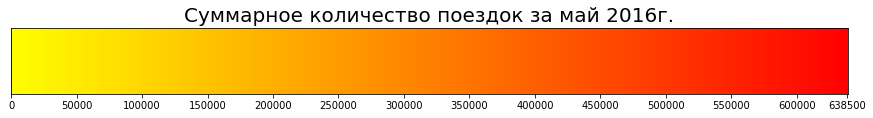

In [28]:
# Градиент.
color_1 = 'Yellow'
color_2 = 'Red'
color_1 = Color(color_1)
grad = list(color_1.range_to(Color(color_2), int(trips_data.max())))

# Colorbar.
plt.figure(figsize=(15, 1.5))
trips_values = list(range(0, int(trips_data.max())+1, 500))
colorbar = np.array([[tuple([int(round(j*255, 0)) for j in grad[int(i)-1].rgb]) for i in trips_values] for _ in range(100)])
plt.imshow(colorbar)
plt.yticks([])
ticks = list(range(len(trips_values)))
plt.xticks(ticks=ticks[::100] + [ticks[-1]], labels=trips_values[::100] + [trips_values[-1]])
plt.title('Суммарное количество поездок за май 2016г.', y=1.01, fontsize=20)
plt.show()

# Карта.
m = folium.Map(location=[40.75, -74.00], 
               #width='80%', height='80%', 
               zoom_start=11, 
               png_enabled=False)
               #tiles = 'Mapbox Bright')

# Рисуем суммарное количество поездок
features = []
for i, reg in enumerate(df.index):
    reg = int(reg)
    
    step_1 = (East - West) / 50
    step_2 = (North - South) / 50
    
    west = West + step_1*((reg//50)+1)
    east = West + step_1*((reg//50))
    south = South + step_2*((reg%50))
    north = South + step_2*((reg%50)-1)
    
    left_down = (south, west)
    left_up = (north, west)
    right_up = (north, east)
    right_down = (south, east)
    
    #print(left_down, left_up, right_up, right_down)
    
    fillcolor = grad[int(trips_data[i]-1)].hex_l
    
    folium.vector_layers.Rectangle([left_down, left_up, right_up, right_down], 
                                   popup=None, tooltip=reg, 
                                   fill=True, fill_color=fillcolor, fill_opacity = 0.5,
                                   stroke=True, color=Color('Black').hex_l, weight=1, opacity=0.1).add_to(m)

m

In [15]:
drop_ids = []
for i in range(df.shape[0]):
    arr = df.values[i]
    if arr.mean() < 5:
        drop_ids.append(i)
df = df.drop(df.index[drop_ids])
print('Количество ячеек со средним числом поездок меньшим пяти - {}'.format(str(len(drop_ids))))
print('Количество оставшихся ячеек - {}'.format(df.shape[0]))

Количество ячеек со средним числом поездок меньшим пяти - 1115
Количество оставшихся ячеек - 102


In [16]:
liberty_coordinates = [40.689247, -74.044502]
lat = liberty_coordinates[0]
lon = liberty_coordinates[1]
title = 'Statue Of Liberty'
tooltip = 'OpenStreetMap'
m = folium.Map(location=[40.75, -74.00], 
               width='80%', height='80%', 
               zoom_start=11, min_zoom =11, max_zoom=11, 
               png_enabled=False)
               #tiles = 'Mapbox Bright')
#folium.Marker(empire_coordinates, popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
folium.Circle([lat, lon], 150, fill=True, color=Color('Yellow').hex_l).add_child(folium.Popup('Statue Of Liberty')).add_to(m)
folium.map.Marker(
    [lat-0.01, lon],
    icon=folium.features.DivIcon(
        icon_size=(120,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 11pt"><b>%s</b></div>' % title,
        )
    ).add_to(m)
m.save('map_3.html')

m

In [17]:
trips_data = np.array([i.sum() for i in np.array(df)])

In [18]:
len(trips_data)

102

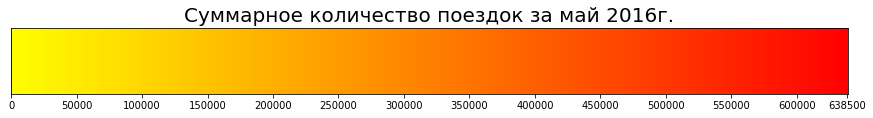

In [19]:
color_1 = 'Yellow'
color_2 = 'Red'
color_1 = Color(color_1)
grad = list(color_1.range_to(Color(color_2), int(trips_data.max())))

# Colorbar.
plt.figure(figsize=(15, 1.5))
trips_values = list(range(0, int(trips_data.max())+1, 500))
colorbar = np.array([[tuple([int(round(j*255, 0)) for j in grad[int(i)-1].rgb]) for i in trips_values] for _ in range(100)])
plt.imshow(colorbar)
plt.yticks([])
ticks = list(range(len(trips_values)))
plt.xticks(ticks=ticks[::100] + [ticks[-1]], labels=trips_values[::100] + [trips_values[-1]])
plt.title('Суммарное количество поездок за май 2016г.', y=1.01, fontsize=20)
plt.show()

# Карта.
m = folium.Map(location=[40.75, -74.00], 
               #width='80%', height='80%', 
               zoom_start=11, 
               png_enabled=False)
               #tiles = 'Mapbox Bright')

# Рисуем суммарное количество поездок
features = []
for i, reg in enumerate(df.index):
    reg = int(reg)
    
    step_1 = (East - West) / 50
    step_2 = (North - South) / 50
    
    west = West + step_1*((reg//50)+1)
    east = West + step_1*((reg//50))
    south = South + step_2*((reg%50))
    north = South + step_2*((reg%50)-1)
    
    left_down = (south, west)
    left_up = (north, west)
    right_up = (north, east)
    right_down = (south, east)
    
    fillcolor = grad[int(trips_data[i]-1)].hex_l
    
    folium.vector_layers.Rectangle([left_down, left_up, right_up, right_down], 
                                   popup=None, tooltip=reg, 
                                   fill=True, fill_color=fillcolor, fill_opacity = 0.5,
                                   stroke=True, color=Color('Black').hex_l, weight=1, opacity=0.1).add_to(m)
    

m.save('map_4.html')
m